<a href="https://colab.research.google.com/github/lvb86/PD_LSTM_GA/blob/main/code/BR_Clima_2013_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Etapa de análise e limpeza de dados

Extração de DF Clima para scenário BR
por Leandro Barbosa

##Declarações

In [2]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3 MB 1.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
import math
import matplotlib.pyplot    as plt
import matplotlib.ticker    as ticker
import matplotlib.style     as style
import numpy                as np
import seaborn              as sns
import pandas               as pd

from urllib.request                 import urlopen
from zipfile                        import ZipFile
from statsmodels.graphics.tsaplots  import plot_acf, plot_pacf
from statsmodels.tsa.seasonal       import seasonal_decompose
from sklearn.metrics                import mean_squared_error
from sklearn.metrics                import mean_absolute_percentage_error
from sklearn.linear_model           import LinearRegression

stl = style.available
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
swap     = '/tmp/'
prefGo   = 'https://drive.google.com/u/0/uc?export=download&id='
urlINMET = prefGo + '1FNrp311pEegFczI7NWCCXqG5BVPSHd6e'

In [4]:
mes = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
mesN = [1,2,3,4,5,6,7,8,9,10,11,12]

palettes = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r',
            'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r',
            'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r',
            'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',
            'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r',
            'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn',
            'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r',
            'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r',
            'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r',
            'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3',
            'Set3_r', 'Spectral', 'Spectral_r',
            #'Vega10', 'Vega10_r', 'Vega20',
            'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 
            'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r',
            'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r',
            'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r',
            'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 
            'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r',
            'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray',
            'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
            'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',
            'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2',
            'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv',
            'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 
            #'jet', ##'jet_r', 
            'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral',
            'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma',
            'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
            'rocket_r', 'seismic', 'seismic_r', ##'spectral', 'spectral_r', 
            'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r',
            'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r',
            'terrain', 'terrain_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r',
            'winter', 'winter_r']

# Definições de estilo
if 1==1: #tema Claro para artigo retrato
    DefPalette = palettes[13] #13 Dark2
    DefPaletteHist = 'rocket'
    DefStyle = stl[15] #15 Seaborn-Darkgrid
    DefSize = (10,6) #(17,6)
    DefGrid = ('-')

else: # tema Escuro para apresentação paisagem
    DefPalette = palettes[123] #123 - hsv
    DefPaletteHist = 'rocket'
    DefStyle = stl[4] #15 dark_background
    DefSize = (10,6) #(17,6)
    DefGrid = (':')
    plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 
                    'ytick.color':'white', 'figure.facecolor':'black'})


In [5]:
# Para traduzir ticker para PT-BR
def formatador_de_milhares(valor, p):
    valor = f"{valor:,.0f}"
    mapa_de_traducao = str.maketrans(',.', '.,')
    return valor.translate(mapa_de_traducao)
#exemplo de uso 
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatador_de_milhares))
#Powered by @lpeixoto2000

## Análise de Consumo de Energia

### Importação dos dados

## Dados INMET

In [8]:
zipresp = urlopen(urlINMET)                # Download from URL
tempzip = open("/tmp/tempfile.zip", "wb")  # Create a new file
tempzip.write(zipresp.read())              # Write the contents of the downloaded file into the new file
tempzip.close()                            # Close the newly-created file
zip = ZipFile("/tmp/tempfile.zip")         # Re-open the newly-created file with ZipFile()

#Adaptado de 
#https://svaderia.github.io/articles/downloading-and-unzipping-a-zipfile/

In [9]:
#zip.infolist()
listINMET = zip.namelist()

In [10]:
zip.namelist()[0]

'$2a$10$OHzmmq.zdsLUvE7h5m19ceuuw43YVRtWaUYzTbEUxU7lY52BX2KcK/'

In [11]:
zip.namelist()[1]

'$2a$10$OHzmmq.zdsLUvE7h5m19ceuuw43YVRtWaUYzTbEUxU7lY52BX2KcK/dados_A108_M_2015-05-13_2020-12-31.csv'

In [12]:
pd.read_csv(zip.open(zip.namelist()[1]),encoding='UTF-8', skiprows=9, sep=';',parse_dates=True, decimal=',').head(3)


,Data Medicao,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)","VENTO, VELOCIDADE MAXIMA MENSAL (AUT)(m/s)","VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)",Unnamed: 7
0,2015-05-31,7.0,NaN,NaN,24.903385,3.4,NaN,NaN
1,2015-06-30,12.0,82.4,989.425139,25.160000,5.3,0.85500,NaN
2,2015-07-31,13.0,80.8,989.038441,25.389113,3.6,0.84422,NaN


In [13]:
pd.read_csv(zip.open(zip.namelist()[1]),encoding='UTF-8', nrows=8, sep=';',parse_dates=True, decimal=',').head(3)


,Nome: CRUZEIRO DO SUL
0,Codigo Estacao: A108
1,Latitude: -7.61083333
2,Longitude: -72.68138888


In [14]:
zip.namelist()[1][-32:-28]

'A108'

In [15]:
for e,i in enumerate(listINMET):
    #print(e,i)
    if e ==0:
        pass
    elif e == 1:
        climaD = pd.read_csv(zip.open(i),encoding='UTF-8', skiprows=9, sep=';',parse_dates=True, decimal=',')
        climaD['origem'] = i[-32:-28]
    else:
        climaD2 = pd.read_csv(zip.open(i),encoding='UTF-8', skiprows=9, sep=';',parse_dates=True, decimal=',')
        climaD2['origem'] = i[-32:-28]
        climaD = climaD.append(climaD2)
#clima.sample(5)
climaD.shape

(51000, 9)

In [16]:
climaD.head(3)

,Data Medicao,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)","VENTO, VELOCIDADE MAXIMA MENSAL (AUT)(m/s)","VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)",Unnamed: 7,origem
0,2015-05-31,7.0,NaN,NaN,24.903385,3.4,NaN,NaN,A108
1,2015-06-30,12.0,82.4,989.425139,25.160000,5.3,0.85500,NaN,A108
2,2015-07-31,13.0,80.8,989.038441,25.389113,3.6,0.84422,NaN,A108


In [17]:
#Carregando todos cabeçalhos dos arquivos INMET
for e, i in enumerate(listINMET):
    if e ==0:
        pass

    elif e ==1:
        climaH = pd.read_csv(zip.open(i), encoding='UTF-8', nrows=8, sep=': ',
                             parse_dates=True, decimal=',').T
        header = climaH.iloc[0]
        climaH.columns = header
        climaH = climaH[1:]
    else:
        climaH2 = pd.read_csv(zip.open(i), encoding='UTF-8', nrows=8, sep=': ',
                              parse_dates=True, decimal=',').T
        climaH2.columns = header
        climaH2 = climaH2[1:]
        climaH = climaH.append(climaH2)
climaH.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


(604, 8)

In [18]:
climaH.head(3)

Nome,Codigo Estacao,Latitude,Longitude,Altitude,Situacao,Data Inicial,Data Final,Periodicidade da Medicao
CRUZEIRO DO SUL,A108,-7.61083333,-72.68138888,220,Pane,2015-05-13,2020-12-31,Mensal
EPITACIOLANDIA,A140,-11.02388888,-68.73527777,224.5,Pane,2013-01-01,2020-12-31,Mensal
FEIJO,A138,-8.142654,-70.343594,157.17,Operante,2013-01-01,2020-12-31,Mensal


In [20]:
climaH.Situacao.value_counts()

Operante      391
Pane          197
Fechada         8
Desativada      8
Name: Situacao, dtype: int64

In [21]:
climaH = climaH.reset_index().set_index('Codigo Estacao').rename(columns={'index':'Cidade','Codigo Estacao':'origem'})

In [22]:
climaH.head(3)

Nome,Cidade,Latitude,Longitude,Altitude,Situacao,Data Inicial,Data Final,Periodicidade da Medicao
Codigo Estacao,,,,,,,,
A108,CRUZEIRO DO SUL,-7.61083333,-72.68138888,220,Pane,2015-05-13,2020-12-31,Mensal
A140,EPITACIOLANDIA,-11.02388888,-68.73527777,224.5,Pane,2013-01-01,2020-12-31,Mensal
A138,FEIJO,-8.142654,-70.343594,157.17,Operante,2013-01-01,2020-12-31,Mensal


In [23]:
climaD = climaD.fillna(method='ffill')

In [24]:
climaD.head(3)

,Data Medicao,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)","VENTO, VELOCIDADE MAXIMA MENSAL (AUT)(m/s)","VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)",Unnamed: 7,origem
0,2015-05-31,7.0,NaN,NaN,24.903385,3.4,NaN,NaN,A108
1,2015-06-30,12.0,82.4,989.425139,25.160000,5.3,0.85500,NaN,A108
2,2015-07-31,13.0,80.8,989.038441,25.389113,3.6,0.84422,NaN,A108


In [25]:
colunasNomes = {
    'Data Medicao':'data',
    'NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)':'Dias_com_precip',
    'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)':'precipitacao',
    'PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)':'pressao',
    'TEMPERATURA MEDIA, MENSAL (AUT)(°C)':'temperatura',
    'VENTO, VELOCIDADE MAXIMA MENSAL (AUT)(m/s)':'vento_max',
    'VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)':'vento_med', 
    'Unnamed: 7':'un',
    'origem':'origem'
}
climaD.rename(columns=colunasNomes, inplace = True)
climaD.drop(columns=['un'], inplace = True)
climaD.columns

Index(['data', 'Dias_com_precip', 'precipitacao', 'pressao', 'temperatura',
       'vento_max', 'vento_med', 'origem'],
      dtype='object')

In [26]:
#Cabeçalhos
climaH.head(3)


Nome,Cidade,Latitude,Longitude,Altitude,Situacao,Data Inicial,Data Final,Periodicidade da Medicao
Codigo Estacao,,,,,,,,
A108,CRUZEIRO DO SUL,-7.61083333,-72.68138888,220,Pane,2015-05-13,2020-12-31,Mensal
A140,EPITACIOLANDIA,-11.02388888,-68.73527777,224.5,Pane,2013-01-01,2020-12-31,Mensal
A138,FEIJO,-8.142654,-70.343594,157.17,Operante,2013-01-01,2020-12-31,Mensal


In [27]:
clima = pd.merge(climaD,climaH, left_on='origem', right_on='Codigo Estacao', how='right')

In [28]:
clima.head(3)

,data,Dias_com_precip,precipitacao,pressao,temperatura,vento_max,vento_med,origem,Cidade,Latitude,Longitude,Altitude,Situacao,Data Inicial,Data Final,Periodicidade da Medicao
0,2015-05-31,7.0,NaN,NaN,24.903385,3.4,NaN,A108,CRUZEIRO DO SUL,-7.61083333,-72.68138888,220,Pane,2015-05-13,2020-12-31,Mensal
1,2015-06-30,12.0,82.4,989.425139,25.160000,5.3,0.85500,A108,CRUZEIRO DO SUL,-7.61083333,-72.68138888,220,Pane,2015-05-13,2020-12-31,Mensal
2,2015-07-31,13.0,80.8,989.038441,25.389113,3.6,0.84422,A108,CRUZEIRO DO SUL,-7.61083333,-72.68138888,220,Pane,2015-05-13,2020-12-31,Mensal


In [29]:
clima.Situacao.value_counts()

Operante      32531
Pane          17566
Fechada         550
Desativada      353
Name: Situacao, dtype: int64

In [30]:
# Excluindo Estações em Pane
clima = clima.query("Situacao != 'Pane' ")

In [31]:
parametros = climaD.columns[1:-1]
parametros

Index(['Dias_com_precip', 'precipitacao', 'pressao', 'temperatura',
       'vento_max', 'vento_med'],
      dtype='object')

In [32]:
clima[['data','temperatura']].groupby('data').mean()

,temperatura
data,
2013-01-31,23.393484
2013-02-28,23.715527
2013-03-31,23.309656
2013-04-30,21.982866
2013-05-31,20.882498
...,...
2020-08-31,20.597029
2020-09-30,22.562058
2020-10-31,23.165546


In [33]:
Mediatemperatura = clima[['data','temperatura']].groupby('data').mean()
Mediatemperatura.rename(columns={'temperatura':('temperatura','media')}, inplace = True)

MediaDias_com_precip = clima[['data','Dias_com_precip']].groupby('data').mean()
MediaDias_com_precip.rename(columns={'Dias_com_precip':('Dias_com_precip','media')}, inplace = True)

Mediaprecipitacao = clima[['data','precipitacao']].groupby('data').mean()
Mediaprecipitacao.rename(columns={'precipitacao':('precipitacao','media')}, inplace = True)

Mediapressao = clima[['data','pressao']].groupby('data').mean()
Mediapressao.rename(columns={'pressao':('pressao','media')}, inplace = True)

Mediavento_max = clima[['data','vento_max']].groupby('data').mean()
Mediavento_max.rename(columns={'vento_max':('vento_max','media')}, inplace = True)

Mediavento_med = clima[['data','vento_med']].groupby('data').mean()
Mediavento_med.rename(columns={'vento_med':('vento_med','media')}, inplace = True)

In [34]:
clima_med=clima[['data','Cidade',*parametros]].groupby(['data','Cidade']).mean()

#clima[['data','temperatura','Cidade']].pivot(['Cidade']) #.groupby(['data']).mean()#.pivot('data','Cidade').head(3)

In [35]:
climaPivot = clima_med.reset_index()[['data','temperatura','Cidade']].pivot('data','Cidade')
climaPivot = pd.merge(climaPivot, Mediatemperatura, right_on='data', left_on='data')

climaPivot2 = clima_med.reset_index()[['data','Dias_com_precip','Cidade']].pivot('data','Cidade')
climaPivot2 = pd.merge(climaPivot2, MediaDias_com_precip, right_on='data', left_on='data')
climaPivot = pd.merge(climaPivot, climaPivot2, right_on='data', left_on='data')

climaPivot2 = clima_med.reset_index()[['data','precipitacao','Cidade']].pivot('data','Cidade')
climaPivot2 = pd.merge(climaPivot2, Mediaprecipitacao, right_on='data', left_on='data')
climaPivot = pd.merge(climaPivot, climaPivot2, right_on='data', left_on='data')

climaPivot2 = clima_med.reset_index()[['data','pressao','Cidade']].pivot('data','Cidade')
climaPivot2 = pd.merge(climaPivot2, Mediapressao, right_on='data', left_on='data')
climaPivot = pd.merge(climaPivot, climaPivot2, right_on='data', left_on='data')

climaPivot2 = clima_med.reset_index()[['data','vento_max','Cidade']].pivot('data','Cidade')
climaPivot2 = pd.merge(climaPivot2, Mediavento_max, right_on='data', left_on='data')
climaPivot = pd.merge(climaPivot, climaPivot2, right_on='data', left_on='data')

climaPivot2 = clima_med.reset_index()[['data','vento_med','Cidade']].pivot('data','Cidade')
climaPivot2 = pd.merge(climaPivot2, Mediavento_med, right_on='data', left_on='data')
climaPivot = pd.merge(climaPivot, climaPivot2, right_on='data', left_on='data')

climaPivot.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


temperatura                             ... vento_med                  
Cidade        AGUA BOA AGUA CLARA AGUAS EMENDADAS  ...  XINGUARA ZE DOCA     media
data                                               ...                            
2013-01-31   24.425806  26.518280       21.403551  ...       NaN     NaN  2.168308
2013-02-28   24.792857  26.250298       22.561161  ...       NaN     NaN  2.085319
2013-03-31   24.792857  26.078592       22.074569  ...       NaN     NaN  1.993334
2013-04-30   24.792857  23.018472       20.956250  ...       NaN     NaN  1.816252
2013-05-31   24.792857  22.097984       20.208468  ...       NaN     NaN  1.772881

[5 rows x 2436 columns]

In [36]:
def analise_correlacao(par):
    '''
    Fitra prarâmetro no data frame para gerar mapa de correlação e ranking
    par: entrada de parâmento  
    return mapa de correlação e ranking 
    '''

    display(par)
    df = climaPivot[par]
    #display(df.head())
    #display(df.corr())
    
    plt.figure(figsize=(30,30))
    ax = sns.heatmap(df.corr(),cmap="YlGnBu", annot=True) 
    plt.title('Correlação Cruzada de '+ par,fontsize=20,y=1.10)
    plt.show();

    ranking = climaPivot[par].corr().sum()
    ranking.sort_values(ascending=False, inplace=True)
    rangingCorrMed = ranking/len(ranking)
    #sns.barplot(rangingCorrMed.reset_index())
    plt.figure(figsize=DefSize)
    ax = rangingCorrMed[:10].plot(kind='bar')
    plt.title('Ranking top 10 maiores correlações médias de '+ par,fontsize=17,y=1.05)
    plt.ylim(rangingCorrMed[10],rangingCorrMed.max())
    plt.show();


In [37]:
if 0:
    for i in parametros:
        analise_correlacao(i)

In [38]:
d = {('dt','data'): climaPivot.reset_index()['data'],
     ('dt','Ano'): climaPivot.reset_index()['data'].str[0:4],
     ('dt','Mês'): climaPivot.reset_index()['data'].str[5:7],
     ('dt','Ano Mês'): climaPivot.reset_index()['data'].str[0:7]}
datas = pd.DataFrame(d)

In [39]:
climaPivot = pd.merge(climaPivot,datas['dt'],right_on='data',left_on=('data'))
climaPivot.rename(columns={'Ano':('dt','Ano'),'Mês':('dt','Mês'),'Ano Mês':('dt','Ano Mês')}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [40]:
climaPivot.head()

,data,"(temperatura, AGUA BOA)","(temperatura, AGUA CLARA)","(temperatura, AGUAS EMENDADAS)","(temperatura, AGUAS VERMELHAS)","(temperatura, ALEGRE)","(temperatura, ALEGRETE)","(temperatura, ALFREDO CHAVES)","(temperatura, ALMENARA)","(temperatura, ALTO ARAGUAIA)","(temperatura, ALTO PARAISO DE GOIAS)","(temperatura, ALTO PARNAIBA)","(temperatura, ALTO TAQUARI)","(temperatura, ALVORADA DO GURGUEIA)","(temperatura, AMARGOSA)","(temperatura, ANGELICA)","(temperatura, APIACAS)","(temperatura, APODI)","(temperatura, AQUIDAUANA)","(temperatura, ARACAJU)","(temperatura, ARACUAI)","(temperatura, ARAL MOREIRA)","(temperatura, ARAPIRACA)","(temperatura, ARARANGUA)","(temperatura, ARAXA)","(temperatura, ARCO VERDE)","(temperatura, AREIA)","(temperatura, AREMBEPE)","(temperatura, ARIRANHA)","(temperatura, ARQ.SAO PEDRO E SAO PAULO)","(temperatura, ARRAIAL DO CABO)","(temperatura, BACABAL)","(temperatura, BAIXA GRANDE DO RIBEIRO)","(temperatura, BAMBUI)","(temperatura, BANDEIRANTES)","(temperatura, BARBACENA)","(temperatura, BARBALHA)","(temperatura, BARRA)","(temperatura, BARRA BONITA)","(temperatura, BARRA DO CORDA)",...,"(vento_med, SURUBIM)","(vento_med, Santa Vitoria do Palmar - Barra do Chui)","(vento_med, TARTARUGALZINHO)","(vento_med, TEOFILO OTONI)","(vento_med, TERESINA)","(vento_med, TEUTONIA)","(vento_med, TIMOTEO)","(vento_med, TOME ACU)","(vento_med, TORRES)","(vento_med, TRAMANDAI)","(vento_med, TRES LAGOAS)","(vento_med, TRES MARIAS)","(vento_med, TRES RIOS)","(vento_med, TUCURUI)","(vento_med, TUPA)","(vento_med, TUPANCIRETA)","(vento_med, UBERABA)","(vento_med, UBERLANDIA)","(vento_med, UNA)","(vento_med, UNAI)","(vento_med, URUCUI)","(vento_med, URUGUAIANA)","(vento_med, URUSSANGA)","(vento_med, VACARIA)","(vento_med, VALENCA)","(vento_med, VALPARAISO)","(vento_med, VARGINHA)","(vento_med, VENDA NOVA DO IMIGRANTE)","(vento_med, VICOSA)","(vento_med, VILA VELHA)","(vento_med, VILHENA)","(vento_med, VITORIA)","(vento_med, VOTUPORANGA)","(vento_med, XANXERE)","(vento_med, XINGUARA)","(vento_med, ZE DOCA)","(vento_med, media)","(dt, Ano)","(dt, Mês)","(dt, Ano Mês)"
0,2013-01-31,24.425806,26.518280,21.403551,23.341532,26.292204,23.786694,26.622312,27.166667,23.330108,20.195564,25.610753,22.637231,26.726541,25.170027,NaN,25.520161,29.262366,28.131855,27.721909,NaN,NaN,26.612903,19.054032,22.152420,26.140054,23.893280,26.422177,24.216935,29.290995,24.351344,26.761022,NaN,NaN,NaN,20.043817,27.240457,27.574328,23.584140,26.881317,...,4.072043,5.102688,2.227419,2.097177,2.687438,1.938190,1.577375,0.956183,3.426882,5.156335,1.490398,2.312903,NaN,0.712798,NaN,NaN,NaN,1.359409,1.458064,1.641129,0.638844,3.165054,1.012903,3.243683,1.700538,2.419220,1.864651,NaN,0.903226,NaN,1.604301,2.056989,2.212231,1.498790,NaN,NaN,2.168308,2013,01,2013-01
1,2013-02-28,24.792857,26.250298,22.561161,23.033185,26.727381,23.691815,27.477232,27.579018,22.880506,21.364435,26.531101,22.380804,26.726541,24.810863,NaN,25.442559,29.576786,27.129613,28.099256,NaN,NaN,26.576339,23.588244,22.152420,26.106696,23.951190,27.141964,24.491369,29.290995,24.416667,26.761022,NaN,NaN,NaN,21.366667,26.802976,29.562947,24.753306,26.430804,...,4.390580,5.927232,1.940923,2.156101,2.687438,1.800935,1.577375,1.071577,2.742708,4.345089,1.112202,2.600149,NaN,0.622917,NaN,NaN,NaN,1.289584,1.244196,1.641129,0.479464,3.203720,0.743006,3.000149,1.645313,1.948363,1.364434,NaN,0.911310,NaN,1.689881,2.016667,1.849405,1.498790,NaN,NaN,2.085319,2013,02,2013-02
2,2013-03-31,24.792857,26.078592,22.074569,23.904454,25.460057,20.572126,25.848851,28.239368,23.702586,21.430603,26.385201,23.083764,25.625245,25.273419,NaN,26.107615,29.576923,27.120402,28.309914,NaN,NaN,26.748563,21.334770,22.152420,26.396983,24.189943,27.218534,24.125862,29.290995,24.951293,26.761022,NaN,NaN,NaN,20.009339,26.853736,29.611782,23.679454,26.941977,...,4.390580,5.204444,2.085500,1.650056,1.161028,1.755242,0.901528,0.968694,2.792111,4.648864,1.021000,2.452500,NaN,0.721667,NaN,NaN,NaN,1.480361,1.336750,1.532111,0.4

In [42]:
parametrosT = ['Dias com Precipitação', 'Precipitacão', 'Pressão', 'Temperatura',
       'Vento Maxímo', 'Vento Médio']

parametrosU = ['', '[mm]', '[mB]', '[°C]',
       '[m/s]', '[m/s]']

len(parametros)

6

In [43]:
climaPivot.sample(3)

,data,"(temperatura, AGUA BOA)","(temperatura, AGUA CLARA)","(temperatura, AGUAS EMENDADAS)","(temperatura, AGUAS VERMELHAS)","(temperatura, ALEGRE)","(temperatura, ALEGRETE)","(temperatura, ALFREDO CHAVES)","(temperatura, ALMENARA)","(temperatura, ALTO ARAGUAIA)","(temperatura, ALTO PARAISO DE GOIAS)","(temperatura, ALTO PARNAIBA)","(temperatura, ALTO TAQUARI)","(temperatura, ALVORADA DO GURGUEIA)","(temperatura, AMARGOSA)","(temperatura, ANGELICA)","(temperatura, APIACAS)","(temperatura, APODI)","(temperatura, AQUIDAUANA)","(temperatura, ARACAJU)","(temperatura, ARACUAI)","(temperatura, ARAL MOREIRA)","(temperatura, ARAPIRACA)","(temperatura, ARARANGUA)","(temperatura, ARAXA)","(temperatura, ARCO VERDE)","(temperatura, AREIA)","(temperatura, AREMBEPE)","(temperatura, ARIRANHA)","(temperatura, ARQ.SAO PEDRO E SAO PAULO)","(temperatura, ARRAIAL DO CABO)","(temperatura, BACABAL)","(temperatura, BAIXA GRANDE DO RIBEIRO)","(temperatura, BAMBUI)","(temperatura, BANDEIRANTES)","(temperatura, BARBACENA)","(temperatura, BARBALHA)","(temperatura, BARRA)","(temperatura, BARRA BONITA)","(temperatura, BARRA DO CORDA)",...,"(vento_med, SURUBIM)","(vento_med, Santa Vitoria do Palmar - Barra do Chui)","(vento_med, TARTARUGALZINHO)","(vento_med, TEOFILO OTONI)","(vento_med, TERESINA)","(vento_med, TEUTONIA)","(vento_med, TIMOTEO)","(vento_med, TOME ACU)","(vento_med, TORRES)","(vento_med, TRAMANDAI)","(vento_med, TRES LAGOAS)","(vento_med, TRES MARIAS)","(vento_med, TRES RIOS)","(vento_med, TUCURUI)","(vento_med, TUPA)","(vento_med, TUPANCIRETA)","(vento_med, UBERABA)","(vento_med, UBERLANDIA)","(vento_med, UNA)","(vento_med, UNAI)","(vento_med, URUCUI)","(vento_med, URUGUAIANA)","(vento_med, URUSSANGA)","(vento_med, VACARIA)","(vento_med, VALENCA)","(vento_med, VALPARAISO)","(vento_med, VARGINHA)","(vento_med, VENDA NOVA DO IMIGRANTE)","(vento_med, VICOSA)","(vento_med, VILA VELHA)","(vento_med, VILHENA)","(vento_med, VITORIA)","(vento_med, VOTUPORANGA)","(vento_med, XANXERE)","(vento_med, XINGUARA)","(vento_med, ZE DOCA)","(vento_med, media)","(dt, Ano)","(dt, Mês)","(dt, Ano Mês)"
15,2014-04-30,24.494667,24.716945,21.327337,21.907500,23.837917,19.659444,25.408823,26.381667,23.242778,20.495833,26.001667,22.582500,25.460139,24.219130,NaN,25.968056,27.533140,26.709052,27.839861,NaN,NaN,25.893611,20.888055,21.436528,24.445012,23.946389,NaN,23.193750,29.290995,24.218750,26.291250,NaN,NaN,NaN,18.459583,25.002361,26.656727,22.709771,26.008056,...,3.125417,5.005278,2.012769,1.227361,0.859306,1.658599,0.711389,0.983308,2.837500,4.597397,0.933690,2.490833,NaN,0.678098,NaN,NaN,NaN,1.613333,1.252917,1.324306,0.378750,3.196111,0.602917,3.208333,1.277848,1.910215,1.602083,NaN,0.688889,NaN,1.665139,1.518708,0.211250,2.724840,NaN,NaN,1.842286,2014,04,2014-04
84,2020-01-31,25.205506,27.642473,22.384683,23.672984,26.090772,25.170296,26.474462,27.781048,24.392070,21.302285,26.093011,23.743087,26.271505,25.045372,26.986425,26.412732,28.570415,26.504167,28.200672,26.902823,25.28871,23.800490,23.946237,23.109005,26.313978,24.485349,NaN,25.813038,27.753889,25.740188,28.405032,25.008749,24.047446,24.132738,20.908871,26.428226,27.276478,24.774731,26.475831,...,3.739919,5.161962,NaN,1.505107,1.094758,1.957393,0.902419,0.418210,3.062903,5.032527,0.000000,2.291129,0.87836,0.289382,2.456364,2.217245,1.875403,1.555914,1.084268,1.407930,0.353226,3.233602,1.295923,2.588449,1.620430,1.258064,1.445699,1.181183,0.803091,3.675,1.664651,1.828214,1.010887,1.681989,1.438306,1.625713,1.875130,2020,01,2020-01
38,2016-03-31,25.675304,25.959543,22.642241,22.856167,27.152016,21.314785,27.099194,28.870161,24.074462,21.722446,27.194086,23.770546,25.840919,25.327823,NaN,26.366935,28.989837,26.303360,28.610349,NaN,NaN,27.044758,22.600806,23.002554,25.430780,23.240054,NaN,24.799866,29.290995,25.770027,27.165778,NaN,NaN,NaN,20.670833,27.137769,29.264516,24.620027,26.831331,...,0.215734,5.835484,2.003495,1.806322,0.954435,1.798790,0.934140,0.828961,2.675000,4.335759,0.699194,2.438306,NaN,

In [44]:
def perfil_medio_clima(_i, _Prefixo = 'Perfil Médio de ', _Escopo = ' no BR'):
    '''
    Gera gráficos de perfis de históricos climáticos apartir de Dataframe e
     Parâmetros de entrada
    '''
    dfTemp = climaPivot[[('dt', 'Ano'),('dt', 'Mês'),('dt', 'Ano Mês'),(parametros[_i],'media')]].reset_index()
    dfTemp.columns = ['col1','Ano','Mês','Ano Mês',parametros[_i]]
    dfTemp.drop('col1', axis =1, inplace = True)
    sns.set_theme()
    style.use(DefStyle)
    plt.figure(figsize=DefSize)
    plt.title(_Prefixo + parametrosT[_i] + _Escopo,y=1.05,fontsize = 17)
    ax = sns.lineplot(data=dfTemp,palette=DefPalette, x = 'Mês', y = parametros[_i], hue = 'Ano') #'hsv'
    plt.grid(True,linestyle = ':')
    #plt.xticks(rotation = 30)

    ax.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), ncol=1, fancybox=False, shadow=True, title = 'Ano')
    plt.ylabel(parametrosT[_i] + ' ' + parametrosU[_i])
    plt.xlabel('Mês')
    plt.show()

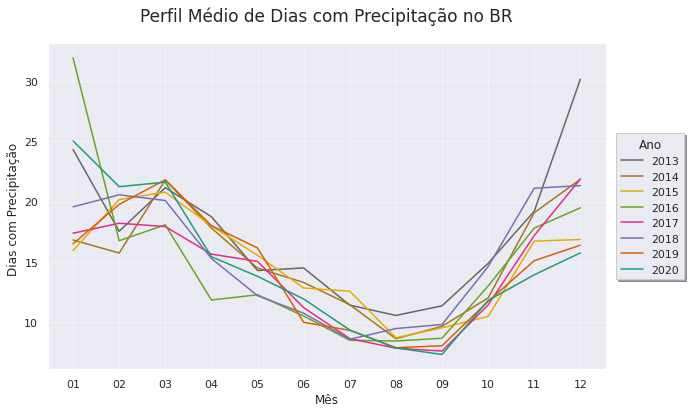

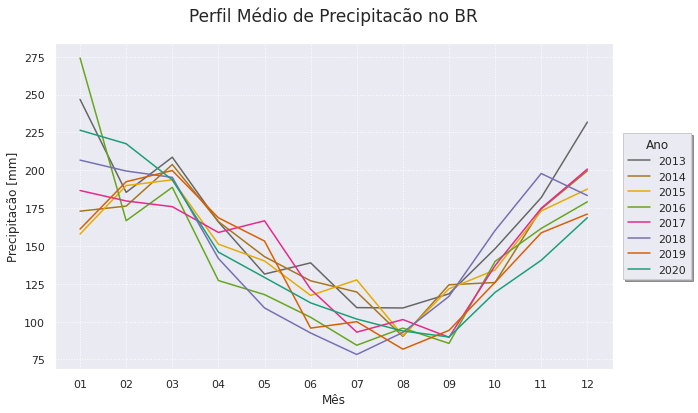

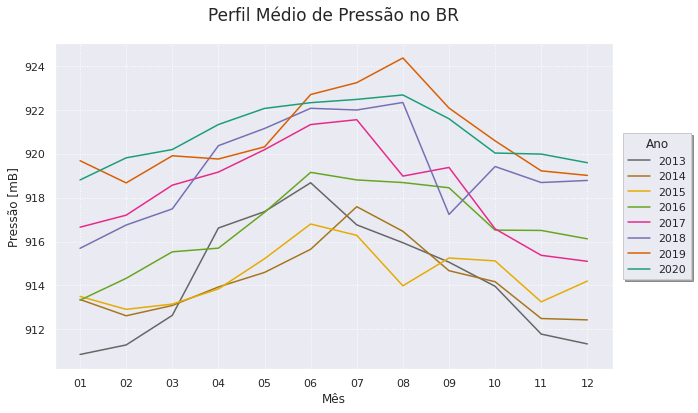

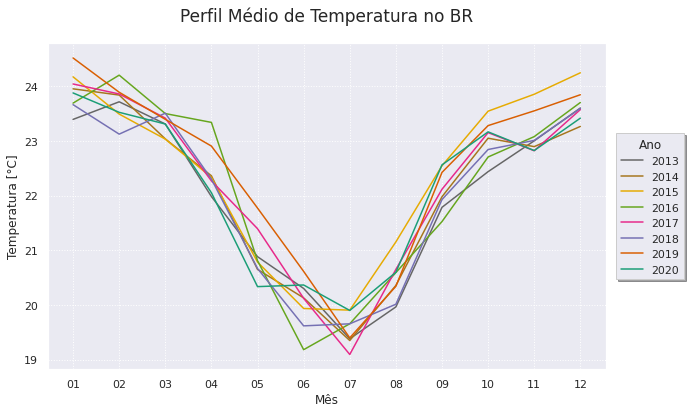

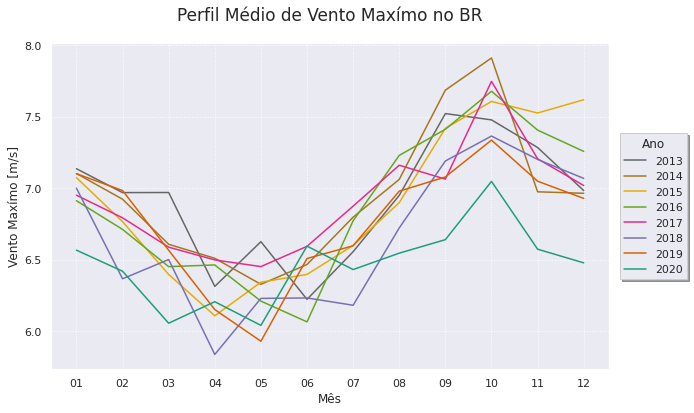

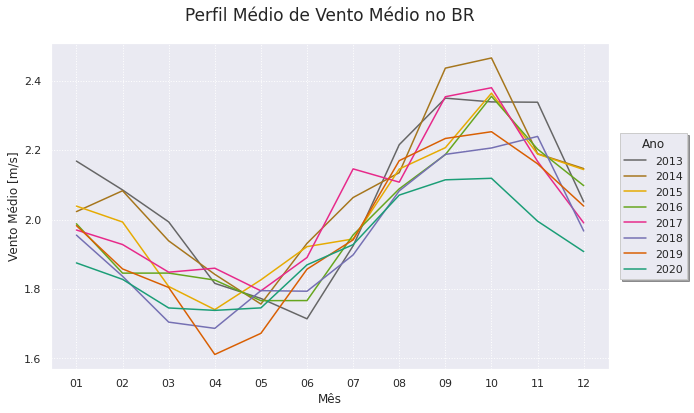

In [45]:
for i in range(0,len(parametros)):
    perfil_medio_clima(i, 'Perfil Médio de ', ' no BR')

##Juntando DF

In [46]:
climaPivot.sample(5)

,data,"(temperatura, AGUA BOA)","(temperatura, AGUA CLARA)","(temperatura, AGUAS EMENDADAS)","(temperatura, AGUAS VERMELHAS)","(temperatura, ALEGRE)","(temperatura, ALEGRETE)","(temperatura, ALFREDO CHAVES)","(temperatura, ALMENARA)","(temperatura, ALTO ARAGUAIA)","(temperatura, ALTO PARAISO DE GOIAS)","(temperatura, ALTO PARNAIBA)","(temperatura, ALTO TAQUARI)","(temperatura, ALVORADA DO GURGUEIA)","(temperatura, AMARGOSA)","(temperatura, ANGELICA)","(temperatura, APIACAS)","(temperatura, APODI)","(temperatura, AQUIDAUANA)","(temperatura, ARACAJU)","(temperatura, ARACUAI)","(temperatura, ARAL MOREIRA)","(temperatura, ARAPIRACA)","(temperatura, ARARANGUA)","(temperatura, ARAXA)","(temperatura, ARCO VERDE)","(temperatura, AREIA)","(temperatura, AREMBEPE)","(temperatura, ARIRANHA)","(temperatura, ARQ.SAO PEDRO E SAO PAULO)","(temperatura, ARRAIAL DO CABO)","(temperatura, BACABAL)","(temperatura, BAIXA GRANDE DO RIBEIRO)","(temperatura, BAMBUI)","(temperatura, BANDEIRANTES)","(temperatura, BARBACENA)","(temperatura, BARBALHA)","(temperatura, BARRA)","(temperatura, BARRA BONITA)","(temperatura, BARRA DO CORDA)",...,"(vento_med, SURUBIM)","(vento_med, Santa Vitoria do Palmar - Barra do Chui)","(vento_med, TARTARUGALZINHO)","(vento_med, TEOFILO OTONI)","(vento_med, TERESINA)","(vento_med, TEUTONIA)","(vento_med, TIMOTEO)","(vento_med, TOME ACU)","(vento_med, TORRES)","(vento_med, TRAMANDAI)","(vento_med, TRES LAGOAS)","(vento_med, TRES MARIAS)","(vento_med, TRES RIOS)","(vento_med, TUCURUI)","(vento_med, TUPA)","(vento_med, TUPANCIRETA)","(vento_med, UBERABA)","(vento_med, UBERLANDIA)","(vento_med, UNA)","(vento_med, UNAI)","(vento_med, URUCUI)","(vento_med, URUGUAIANA)","(vento_med, URUSSANGA)","(vento_med, VACARIA)","(vento_med, VALENCA)","(vento_med, VALPARAISO)","(vento_med, VARGINHA)","(vento_med, VENDA NOVA DO IMIGRANTE)","(vento_med, VICOSA)","(vento_med, VILA VELHA)","(vento_med, VILHENA)","(vento_med, VITORIA)","(vento_med, VOTUPORANGA)","(vento_med, XANXERE)","(vento_med, XINGUARA)","(vento_med, ZE DOCA)","(vento_med, media)","(dt, Ano)","(dt, Mês)","(dt, Ano Mês)"
6,2013-07-31,23.991784,18.915019,19.313417,18.399306,20.575941,13.307433,21.343011,22.609800,20.341690,19.209946,25.477016,19.534409,27.554839,20.981235,NaN,25.636962,26.329663,20.339113,25.244489,NaN,NaN,22.469758,13.967179,19.003750,20.576778,20.562673,25.138038,18.181317,29.290995,21.465901,26.963458,NaN,NaN,NaN,15.589247,24.354839,25.973329,17.344530,27.009736,...,2.869741,4.273253,1.622043,1.460618,0.985081,1.648750,0.878360,0.884293,2.390457,2.859940,0.981720,2.949059,NaN,0.583777,NaN,NaN,NaN,1.955242,1.380780,1.807930,1.055645,3.143011,0.726075,3.457018,1.255982,2.405107,1.245699,NaN,0.667204,NaN,1.853547,1.548790,0.211250,1.239976,NaN,NaN,1.924426,2013,07,2013-07
77,2019-06-30,25.205506,21.196806,19.197500,19.044565,21.880694,17.738750,22.701250,23.606806,21.181171,18.830586,25.537639,20.490972,26.821667,21.837500,22.464785,26.448810,26.812749,22.864881,25.754167,23.284167,19.665278,23.800490,18.240417,19.464861,22.125556,21.499028,NaN,18.795833,27.595695,23.783056,27.059444,25.661828,16.998958,24.132738,16.449722,25.249094,26.555833,19.821866,26.309895,...,3.515622,6.091417,NaN,0.804445,0.831528,1.731111,0.443611,0.680278,2.097808,0.905996,0.876111,2.548611,0.692639,0.513119,2.684722,2.146528,2.578611,1.924722,1.252201,1.429583,0.783333,3.139861,1.127917,3.083889,1.219297,1.588056,1.572222,0.789167,0.475417,2.397029,2.029249,1.162301,1.065694,2.651111,1.340644,NaN,1.857171,2019,06,2019-06
67,2018-08-31,23.637917,20.751747,21.102823,20.424431,21.004032,12.894220,21.251747,24.387769,22.976075,20.778898,26.766667,21.794355,28.586156,21.050000,19.121909,25.057222,27.666796,20.746537,25.537769,24.557258,17.000000,22.681586,14.764177,20.603169,22.440995,21.332258,NaN,19.942070,26.421371,21.399866,27.888038,27.182392,18.510887,19.728629,15.899597,26.232930,27.658065,19.800269,28.205336,...,3.839785,4.881183,NaN,1.436156,1.172177,1.803629,0.763172,0.804032,2.51

In [47]:
dfClimaMed = climaPivot[[('data'),('dt', 'Ano'),('dt', 'Mês'),('dt', 'Ano Mês'),('Dias_com_precip','media'),
            ('precipitacao','media'),('pressao','media'),('temperatura','media'),
            ('vento_max','media'),('vento_med','media')]].reset_index()

dfClimaMed.columns = ['col1','Data','Ano','Mês','Ano Mês','Dias com Precipitação',
                  'Precipitação','Pressão','Temperatura','Vento Máx','Vento Méd']
dfClimaMed.drop('col1', axis =1, inplace = True)
dfClimaMed.head()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,Data,Ano,Mês,Ano Mês,Dias com Precipitação,Precipitação,Pressão,Temperatura,Vento Máx,Vento Méd
0,2013-01-31,2013,01,2013-01,24.310968,246.816448,910.844015,23.393484,7.138098,2.168308
1,2013-02-28,2013,02,2013-02,17.533548,185.409741,911.280033,23.715527,6.971059,2.085319
2,2013-03-31,2013,03,2013-03,21.150809,208.611393,912.630237,23.309656,6.971698,1.993334
3,2013-04-30,2013,04,2013-04,18.742395,165.849514,916.620874,21.982866,6.314890,1.816252
4,2013-05-31,2013,05,2013-05,14.274434,131.424096,917.368179,20.882498,6.627884,1.772881


In [48]:
VarClima = dfClimaMed.corr().columns

In [49]:
dfClimaMed.corr()

,Dias com Precipitação,Precipitação,Pressão,Temperatura,Vento Máx,Vento Méd
Dias com Precipitação,1.000000,0.962851,-0.491102,0.648791,-0.077353,-0.254933
Precipitação,0.962851,1.000000,-0.531346,0.748205,0.040452,-0.157339
Pressão,-0.491102,-0.531346,1.000000,-0.456056,-0.367842,-0.268353
Temperatura,0.648791,0.748205,-0.456056,1.000000,0.358950,0.159135
Vento Máx,-0.077353,0.040452,-0.367842,0.358950,1.000000,0.902535
Vento Méd,-0.254933,-0.157339,-0.268353,0.159135,0.902535,1.000000


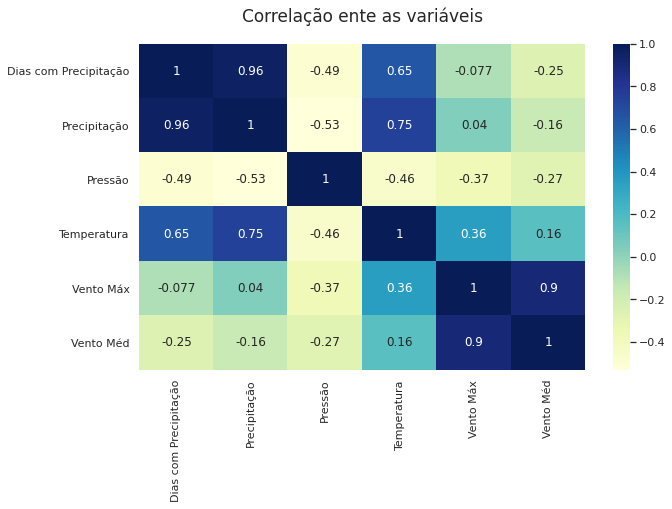

In [50]:
sns.set_theme()
style.use(DefStyle)  #4
#plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 'axes.titlecolor':'white','ytick.color':'white', 'figure.facecolor':'black'})

plt.figure(figsize=DefSize)
plt.title('Correlação ente as variáveis',y=1.05,fontsize = 17)
ax = sns.heatmap(dfClimaMed.corr(),cmap="YlGnBu", annot=True) 

In [51]:
dfClimaMed['Data'] = pd.to_datetime(dfClimaMed['Data'])

In [52]:
dfClimaMed.head()

,Data,Ano,Mês,Ano Mês,Dias com Precipitação,Precipitação,Pressão,Temperatura,Vento Máx,Vento Méd
0,2013-01-31,2013,01,2013-01,24.310968,246.816448,910.844015,23.393484,7.138098,2.168308
1,2013-02-28,2013,02,2013-02,17.533548,185.409741,911.280033,23.715527,6.971059,2.085319
2,2013-03-31,2013,03,2013-03,21.150809,208.611393,912.630237,23.309656,6.971698,1.993334
3,2013-04-30,2013,04,2013-04,18.742395,165.849514,916.620874,21.982866,6.314890,1.816252
4,2013-05-31,2013,05,2013-05,14.274434,131.424096,917.368179,20.882498,6.627884,1.772881


In [53]:
dfClimaMed.columns

Index(['Data', 'Ano', 'Mês', 'Ano Mês', 'Dias com Precipitação',
       'Precipitação', 'Pressão', 'Temperatura', 'Vento Máx', 'Vento Méd'],
      dtype='object')

In [54]:
VarClima

Index(['Dias com Precipitação', 'Precipitação', 'Pressão', 'Temperatura',
       'Vento Máx', 'Vento Méd'],
      dtype='object')

In [56]:
dfClimaMed.to_csv(swap+'BR_2013_2020_clima.csv', index=False)

In [57]:
dfClimaMed

,Data,Ano,Mês,Ano Mês,Dias com Precipitação,Precipitação,Pressão,Temperatura,Vento Máx,Vento Méd
0,2013-01-31,2013,01,2013-01,24.310968,246.816448,910.844015,23.393484,7.138098,2.168308
1,2013-02-28,2013,02,2013-02,17.533548,185.409741,911.280033,23.715527,6.971059,2.085319
2,2013-03-31,2013,03,2013-03,21.150809,208.611393,912.630237,23.309656,6.971698,1.993334
3,2013-04-30,2013,04,2013-04,18.742395,165.849514,916.620874,21.982866,6.314890,1.816252
4,2013-05-31,2013,05,2013-05,14.274434,131.424096,917.368179,20.882498,6.627884,1.772881
...,...,...,...,...,...,...,...,...,...,...
91,2020-08-31,2020,08,2020-08,7.855980,93.813202,922.698215,20.597029,6.547444,2.070480
92,2020-09-30,2020,09,2020-09,7.309924,89.878312,921.611432,22.562058,6.641936,2.114456
93,2020-10-31,2020,10,2020-10,11.788295,119.342840,920.044718,23.165546,7.049519,2.118840
94,2020-11-30,2020,11,2020-11,13.919593,140.526749,919.997600,22.824053,6.575351,1.995313
